聚类的思想：将数据集划分为若干个不相交子集，每个簇潜在地对应某一个概念。

聚类的作用：
- 作为一种探索性分析方法，用来分析数据的内在特点，寻找数据的分布规律。
- 作为分类的预处理过程，并不直接解决数据分析，首先对需要分类的数据进行聚类，然后对聚类出的结果的每一个簇上，进行分类，实现数据的预处理。

### k均值聚类


### 高斯混合聚类

### 密度聚类(Density-Based Clustering)

### 层次聚类
- 可在不同层上对数据集进行划分，形成树状的聚类结构。

#### AGglomerative NESting（AGNES）
> 最初将每个对象看成一个簇，然后这些簇根据某些准则（如距离最近）被一步步地合并，就这样不断地合并直到达到预设的聚类簇的个数。

给定聚类簇$C_i,C_j$，簇之间的距离：
> 1. 最小距离：$$d_{min}(C_i,C_j)=\underset{\vec{x}_i\in C_i,\vec{j}_j\in C_j}{min}distance(\vec{x}_i,\vec{x}_j)$$
> 2. 最大距离：$$d_{max}(C_i,C_j)=\underset{\vec{x}_i\in C_i,\vec{j}_j\in C_j}{max}distance(\vec{x}_i,\vec{x}_j)$$
> 3. 平均距离：$$d_{avg}(C_i,C_j)=\frac{1}{|C_i||C_j|}\sum_{\vec{x}_i\in C_i}\sum_{\vec{x}_j\in C_j} distance(\vec{x}_i,\vec{x}_j)$$。两个簇的样本对之间距离的平均值。

- single-linkage算法：AGNES算法的聚类簇距离采用$d_{min}$。
- complete-linkage算法：AGNES算法的聚类簇距离采用$d_{max}$。
- averave-linkage算法：AGNES算法的聚类簇距离采用$d_{avg}$。

____
### EM算法（期望极大算法）
- 一种迭代算法，用于含有隐变量的概率模型参数估计。
- E步求期望；M步求极大。

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn import cluster
from sklearn.metrics import adjusted_rand_score
from sklearn import mixture

In [9]:
def create_data(centers, num=100, std=0.7):
    X, labels_true = make_blobs(n_samples=num, centers=centers, cluster_std=std)
    return X, labels_true

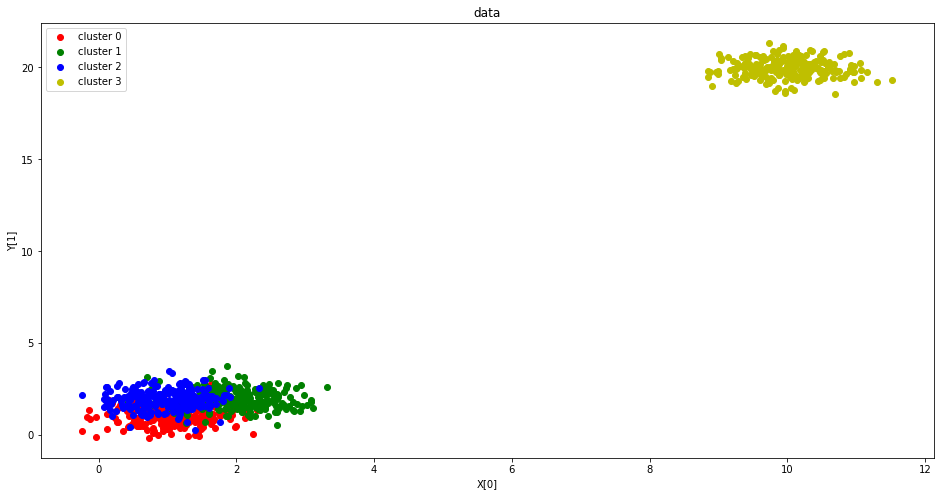

In [10]:
def plot_data(*data):
    X, labels_true = data
    labels = np.unique(labels_true)
    fig = plt.figure(figsize=(16, 8))
    ax = fig.add_subplot(1, 1, 1)
    colors = 'rgbyckm'
    for i, label in enumerate(labels):
        position = labels_true == label
        ax.scatter(X[position, 0], X[position, 1], label="cluster %d"%label, color=colors[i%len(colors)])
    ax.legend(loc="best")
    ax.set_xlabel("X[0]")
    ax.set_ylabel("Y[1]")
    ax.set_title("data")
    plt.show()
    
X, labels_true = create_data([[1,1],[2,2],[1,2],[10,20]], 1000, 0.5)
plot_data(X, labels_true)

### 实战
#### KMeans
**sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto')**
> 1. n_clusters：整数，指定分类簇的数量。
> 2. init：字符串，指定初始均值向量的策略。
    - k-means++：其初始均值向量相互之间都距离较远，效果较好。
    - random：从数据集中随机选择K个样本作为初始均线向量。
> 3. n_init：整数，指定了$k$均值算法运行的次数。每一次都会选择一组不同的初始化均值向量，最终算法会选择最佳的分类簇来作为最终的结果。
> 4. max_iter：指定单轮$k$均值算法中，最大的迭代次数。
> 5. precompute_distances：是否提前计算好样本之间的距离。
    - auto：如果n_samples*n_clusters > 12 million，则不提前计算。
    - True：总是提前计算。
> 6. verbose：整数。若为1，每隔一段时间打印一次日志信息。
> 7. copy_x：若为True，则计算距离的时候，并不修改原始数据。

属性：
> 1. cluster_centers_：给出分类簇的均值向量。
> 2. labels_：给出每个样本所属的簇的标记。
> 3. inertia_：给出每个样本距离它们各自最近的簇中心的距离之和。

方法：
> 1. fit(X[, y])：训练模型
> 2. fit_predict(X[, y])：训练模型并预测每个样本所属的簇
> 3. predict(X)：预测样本所属的簇
> 4. score(X[, y])：给出样本距离各簇中心的偏移量的相反数。

In [12]:
def test_Kmeans(*data):
    X, labels_true = data
    clst = cluster.KMeans()
    clst.fit(X)
    predicted_labels = clst.predict(X)
    print("ARI:%s"% adjusted_rand_score(labels_true, predicted_labels))
    print("Sum center distance %s"% clst.inertia_)
    
test_Kmeans(X, labels_true)

ARI:0.32111007532884617
Sum center distance 226.77371241801742


#### 密度聚类（DBSCAN）
**sklearn.cluster.DBSCAN(eps=0.5, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)**
> 1. eps：$\epsilon$参数，用于确定领域大小。
> 2. min_samples：minPts参数，用于判断核心对象。
    - 随着min_samples的增长，样本点的领域中必须包含更多的样本才能使它成为一个核心样本点。
> 3. metric：字符串，用于计算距离。
> 4. algorithm：字符串，用于计算两点间距离并找出最近邻的点。
    - auto：由算法自动选取合适的算法
    - ball_tree：用ball树来搜索
    - kd_tree
    - brute
> 5. leaf_size：树的叶节点大小

属性：
> 1. core_sample_indices：核心样本在原始训练集中的位置
> 2. components_：核心样本的一份副本
> 3. labels_：每个样本所属的簇标记。

方法：
> 1. fit(X[, y, sample_weight])：训练模型
> 2. fit_predict(X[, y, sample_weight])

In [13]:
def test_DBSCAN(*data):
    X, labels_true = data
    clst = cluster.DBSCAN()
    predict_labels = clst.fit_predict(X)
    print("ARI:%s"% adjusted_rand_score(labels_true, predict_labels))
    print("Core sample num:%s"% len(clst.core_sample_indices_))
    
test_DBSCAN(X, labels_true)

ARI:0.331481993488152
Core sample num:990


#### 层次聚类（AgglomerativeClustering）
**sklearn.cluster.AgglomerativeClustering(n_clusters=2, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', pooling_func='deprecated')**
> 1. affinity：字符串，用于计算距离。可为euclidean, l1, l2, manhattan, cosine, precomputed。若linkage为ward，其必须为euclidean。
> 2. memory：用于缓存输出的结果，默认不缓存
> 3. compute_full_tree：若为True，继续训练从而产生一颗完整的树
> 4. linkage：字符串，指定链接算法
    - ward：single-linkage算法
    - complete：complete-linkage算法
    - average：average-linkage算法
    
属性：
> 1. labels_：每个样本的簇标记
> 2. n_leaves_：分层树的叶结点数量
> 3. n_components_：连接图中连接分量的估计值
> 4. children_：数组，给出每个非叶结点的子节点数量

方法：
> 1. fit(X[, y])：训练模型
> 2. fit_predict(X[, y])

In [15]:
def test_AgglomerativeClustering(*data):
    X, labels_true = data
    clst = cluster.AgglomerativeClustering()
    predict_labels = clst.fit_predict(X)
    print("ARI:%s"% adjusted_rand_score(labels_true, predict_labels))
    
test_AgglomerativeClustering(X, labels_true)

ARI:0.33266533066132264


#### 混合高斯模型（GaussianMixture）
**sklearn.mixture.GaussianMixture(n_components=1, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)**
> 1. n_components：整数，指定分模型的数量。
> 2. covariance_type：字符串，指定协方差的类型。
    - spherical：球状型，每个分模型的协方差矩阵都是一个标量值
    - tied：结点型，所有的分模型都共享一个协方差矩阵
    - diag：对角型，每个分模型的协方差矩阵都是对角矩阵
    - full：全型，每个分模型都有自己的协方差矩阵。
> 3. reg_covar：浮点数，添加到协方差矩阵对角线上元素，确保所有的协方差都是正数
> 4. init_params：指定初始化权重的策略
> 5. weights_init：(n_components,)序列，指定初始化的权重
> 6. means_init：(n_components, n_features)数组，指定初始化的均值
> 7. verbose_interval：整数，指定输出日志的间隔

属性：
> 1. weights_：数组，形状为(n_components,)，存储每个分模型的权重
> 2. means_：数组，形状为(n_components, n_features)，存储每个分模型的均值$\mu_k$

方法：
> 1. fit(X[, y])：训练模型
> 2. fit_predict(X[, y])
> 3. predict(X)
> 4. predict_proba(X)
> 5. sample([n_samples, random_state])：根据模型来随机生成一组样本
> 6. score(X[, y])：计算模型在样本总体上的对数似然函数
> 7. score_samples(X)：给出每个样本的对数似然函数

In [19]:
def test_GMM(*data):
    X, labels_true = data
    clst = mixture.GaussianMixture(n_components=4)
    predict_labels = clst.fit_predict(X)
    print("ARI:%s"% adjusted_rand_score(labels_true, predict_labels))
    
test_GMM(X, labels_true)

ARI:0.612284709442999


- K均值算法：通用聚类方法，用于均匀的簇的大小，簇的数量不多的情况。
- DBSCAN算法：用于不均匀的簇大小，以及非平坦的集合结构。
- AgglomerationClustering算法：用于簇的数量较多，有连接约束等情况。
- GMM算法：用于平坦的集合结构，对密度估计很合适。

对于聚类簇的数量的选取，如给出了ARI随n_clusters的曲线，可选择曲线上ARI最大值附近的一批n_clusters。

如果要求每个簇内足够纯净，则倾向于选择较大的n_clusters。如果要求尽可能地将相似的样本划归到一个簇中，则倾向于选择较小的n_clusters。